In [53]:
import numpy as np
import os
import json
import matplotlib.pyplot as plt
from matplotlib import colors

In [54]:
training_path = 'data/training'
evaluation_path = 'data/evaluation'
training_tasks = sorted(os.listdir(training_path))
# evaluation_tasks = sorted(os.listdir(evaluation_path))

# print(len(training_tasks), len(evaluation_tasks))

In [55]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown

In [56]:
def get_data(task_filename):
    with open(task_filename, 'r') as f:
        task = json.load(f)
    return task

num2color = ["black", "blue", "red", "green", "yellow", "gray", "magenta", "orange", "sky", "brown"]
color2num = {c: n for n, c in enumerate(num2color)}

In [57]:
# This is nothing. This part is just plotting everything - training model, testing model (input, output, prediction)

def check(task, pred_func):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(3, n, figsize=(4*n,12), dpi=50)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in)

        # Plot input of the training dataset
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))

        # Plot output of the training dataset
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))

        # Plot prediction of the training dataset
        axs[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        axs[2][fig_num].set_title(f'Train-{i} pred')
        axs[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        axs[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1

    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in)

        # Plot input of the training dataset
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))

        # Plot output of the training dataset
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))

        # Plot prediction of the training dataset
        axs[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        axs[2][fig_num].set_title(f'Test-{i} pred')
        axs[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        axs[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1

Period is :  4
Period is :  2
Period is :  3
Period is :  3


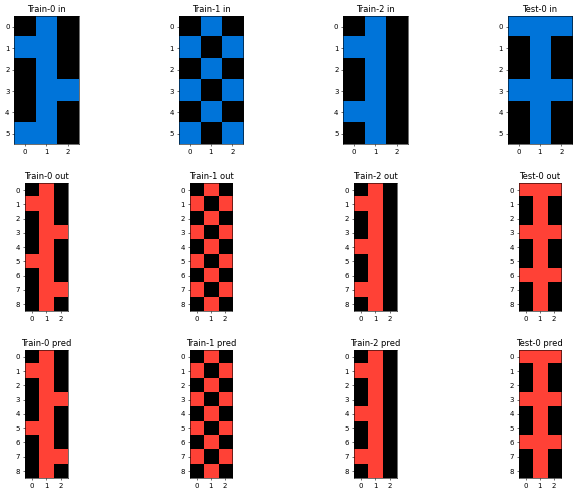

In [58]:
def task_train002(x):
    red, blue = color2num["red"], color2num["blue"]

    def get_period_length(arr):
        H = len(arr)  # Height of the array
        W = len(arr[0])  # Width of the array
        period = 1
        while True:
            # Perform cyclic padding 
            cycled = [[arr[i % period][j] for j in range(W)] for i in range(H)]
            for i in range(H - period):
                cycled.append(arr[i][:])
            # Check if the padded array matches the original array
            all_equal = True
            for i in range(H):
                for j in range(W):
                    if cycled[i][j] != arr[i][j]:
                        all_equal = False
                        break
                if not all_equal:
                    break
            if all_equal:
                return period
            period += 1

            
    def change_color(arr, d): # Because the output is in red color.
        res = arr.copy()
        for blue, red in d.items():
            res[arr==blue] = red # Change the blue color to red color.
        return res
            
    period = get_period_length(x)
    print("Period is : ", period)
    y = x[:period, :]  # clop one period (removes the data that falls in one period length of the given array)
    y = np.pad(y, ((0,9-period),(0,0)), 'wrap')  # this line will repeat the period to make it oh height 10.
    y = change_color(y, {blue: red})
    return y
    
task = get_data('data/training/' + training_tasks[2])
check(task, task_train002)